# Évaluation des modèles (SVM, Naive Bayes, Logistique, Arbres des décisions)

## 1. Télechargement des packages nécessaires

In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score
import matplotlib.pyplot as plt
from tabulate import tabulate

## 2. Importation des valeurs du taux de faux positifs, du taux de vrais positifs et de l'AUC des modèles

In [2]:
with open('Variables/variables.pkl', 'rb') as f:
    (df, X_train, X_test, y_train, y_test,X_train_smote, y_train_smote) = pickle.load(f)

In [3]:
with open('Variables/roc_data_svm.pkl', 'rb') as f:
    roc_data_svm = pickle.load(f)

fpr_svm = roc_data_svm['fpr_svm']
tpr_svm = roc_data_svm['tpr_svm']
auc_svm = roc_data_svm['auc_svm']
pred_svm = roc_data_svm['pred_svm']

In [4]:
with open('Variables/roc_data_NB.pkl', 'rb') as f:
    roc_data_NB = pickle.load(f)

fpr_nb = roc_data_NB['fpr_nb']
tpr_nb = roc_data_NB['tpr_nb']
auc_nb = roc_data_NB['auc_nb']
pred_nb = roc_data_NB['pred_nb']

In [5]:
with open('Variables/roc_data_log.pkl', 'rb') as f:
    roc_data_log = pickle.load(f)

fpr_log = roc_data_log['fpr_log']
tpr_log = roc_data_log['tpr_log']
auc_log = roc_data_log['auc_log']
pred_log = roc_data_log['pred_log']
pred_log = (pred_log >= 0.5).astype(int) 

In [6]:
with open('Variables/roc_data_tree.pkl', 'rb') as f:
    roc_data_tree = pickle.load(f)

fpr_tree = roc_data_tree['fpr_dt']
tpr_tree = roc_data_tree['tpr_dt']
auc_tree = roc_data_tree['roc_dt']
pred_tree = roc_data_tree['pred_dt']

## 3. Évaluation et Critique

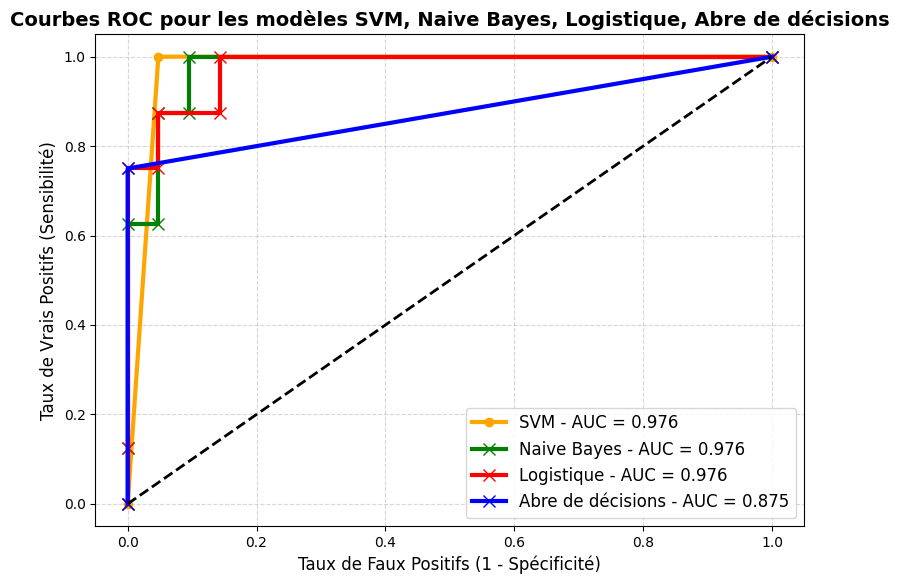

In [7]:
plt.figure(figsize=(8, 6))

# Plot SVC (Noyau RBF)
plt.plot(fpr_svm, tpr_svm, label=f'SVM - AUC = {auc_svm:.3f}', linewidth=3, marker='o', markersize=6, markerfacecolor='orange', color='orange')

# Plot Naive Bayes
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes - AUC = {auc_nb:.3f}', linewidth=3, marker='x', markersize=8, markerfacecolor='green', color='green')

# Plot Logistic
plt.plot(fpr_log, tpr_log, label=f'Logistique - AUC = {auc_log:.3f}', linewidth=3, marker='x', markersize=8, markerfacecolor='red', color='red')

# Plot abre de decision
plt.plot(fpr_tree, tpr_tree, label=f'Abre de décisions - AUC = {auc_tree:.3f}', linewidth=3, marker='x', markersize=8, markerfacecolor='blue', color='blue')

# Ajouter une ligne diagonale (modèle aléatoire)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)

plt.rcParams['font.size'] = 12
plt.title('Courbes ROC pour les modèles SVM, Naive Bayes, Logistique, Abre de décisions', fontsize=14, fontweight='bold')
plt.xlabel('Taux de Faux Positifs (1 - Spécificité)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (Sensibilité)', fontsize=12)

plt.legend(loc='lower right', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

# Afficher le graphique
plt.tight_layout()
plt.show()

In [8]:
models = {
    "SVM": pred_svm,
    "Naive Bayes": pred_nb,
    "Logistique":pred_log,
    "Abre de Décision" :pred_tree
}

# Calcul de la précision (Accuracy) pour chaque modèle
accuracy_scores = {model: accuracy_score(y_test, y_pred) for model, y_pred in models.items()}

# Calcul du F1-score pour chaque modèle
f1_scores = {model: f1_score(y_test, y_pred) for model, y_pred in models.items()}

auc_scores = {
    "svm": auc_svm,
    "nb": auc_nb,
    "log":auc_log,
    "dt":auc_tree
}

# Création d'un DataFrame pour afficher les résultats
df_results = pd.DataFrame({
    "Model": accuracy_scores.keys(),
    "Accuracy": [round(acc, 5) for acc in accuracy_scores.values()],
    "F1-score": [round(f1, 5) for f1 in f1_scores.values()],
    "AUC-ROC": [round(auc_val, 5) for auc_val in auc_scores.values()]
})

# Affichage du tableau des résultats
print("Table de comparaison des modèles")
print(tabulate(df_results, headers='keys', tablefmt='pretty', showindex=False))

Table de comparaison des modèles
+------------------+----------+----------+---------+
|      Model       | Accuracy | F1-score | AUC-ROC |
+------------------+----------+----------+---------+
|       SVM        | 0.96552  | 0.94118  | 0.97619 |
|   Naive Bayes    | 0.89655  | 0.84211  | 0.97619 |
|    Logistique    | 0.89655  | 0.82353  | 0.97619 |
| Abre de Décision | 0.93103  | 0.85714  |  0.875  |
+------------------+----------+----------+---------+
